In [219]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import io
import time
import datetime
import time
plt.style.use("ggplot")

In [220]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [221]:
#Import sklearn libraries
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report


In [222]:
#Read file
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

In [223]:
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.008,0.000,0.004,0.006,0.011,0.044,0.426,0.022,0.031,0.030,0.065,0.022,21.033,1,0.415,0.815,-4.813,0.266,2.301,0.285
1,phon_R01_S01_2,122.400,148.650,113.819,0.010,0.000,0.005,0.007,0.014,0.061,0.626,0.031,0.045,0.044,0.094,0.019,19.085,1,0.458,0.820,-4.075,0.336,2.487,0.369
2,phon_R01_S01_3,116.682,131.111,111.555,0.011,0.000,0.005,0.008,0.016,0.052,0.482,0.028,0.039,0.036,0.083,0.013,20.651,1,0.430,0.825,-4.443,0.311,2.342,0.333
3,phon_R01_S01_4,116.676,137.871,111.366,0.010,0.000,0.005,0.007,0.015,0.055,0.517,0.029,0.040,0.038,0.088,0.014,20.644,1,0.435,0.819,-4.118,0.334,2.406,0.369
4,phon_R01_S01_5,116.014,141.781,110.655,0.013,0.000,0.007,0.009,0.020,0.064,0.584,0.035,0.048,0.045,0.105,0.018,19.649,1,0.417,0.823,-3.748,0.235,2.332,0.410
5,phon_R01_S01_6,120.552,131.162,113.787,0.010,0.000,0.005,0.007,0.014,0.047,0.456,0.023,0.035,0.032,0.070,0.012,21.378,1,0.416,0.825,-4.243,0.299,2.188,0.358
6,phon_R01_S02_1,120.267,137.244,114.820,0.003,0.000,0.002,0.002,0.005,0.016,0.140,0.008,0.009,0.014,0.023,0.006,24.886,1,0.596,0.764,-5.634,0.258,1.855,0.212
7,phon_R01_S02_2,107.332,113.840,104.315,0.003,0.000,0.001,0.002,0.004,0.016,0.134,0.008,0.009,0.013,0.025,0.003,26.892,1,0.637,0.763,-6.168,0.184,2.065,0.164
8,phon_R01_S02_3,95.730,132.068,91.754,0.006,0.000,0.003,0.003,0.009,0.021,0.191,0.011,0.013,0.017,0.032,0.011,21.812,1,0.616,0.774,-5.499,0.328,2.323,0.232
9,phon_R01_S02_4,95.056,120.103,91.226,0.005,0.000,0.003,0.003,0.008,0.028,0.255,0.014,0.017,0.024,0.043,0.010,21.862,1,0.547,0.798,-5.012,0.326,2.433,0.271


In [224]:
X = data.drop(['name', 'status'], axis = 1)
Y = data['status']

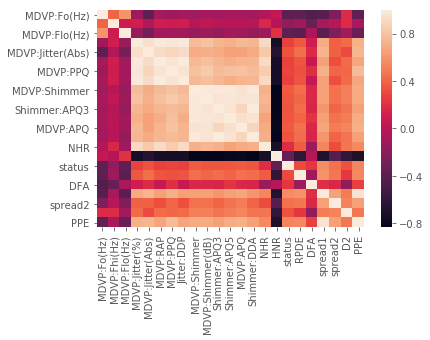

In [225]:
sns.heatmap(data.iloc[:,1:data.shape[1]].corr())

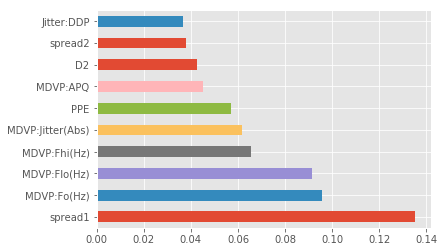

In [226]:
model = ExtraTreesClassifier()
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [227]:
feat_importances.index.tolist()

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

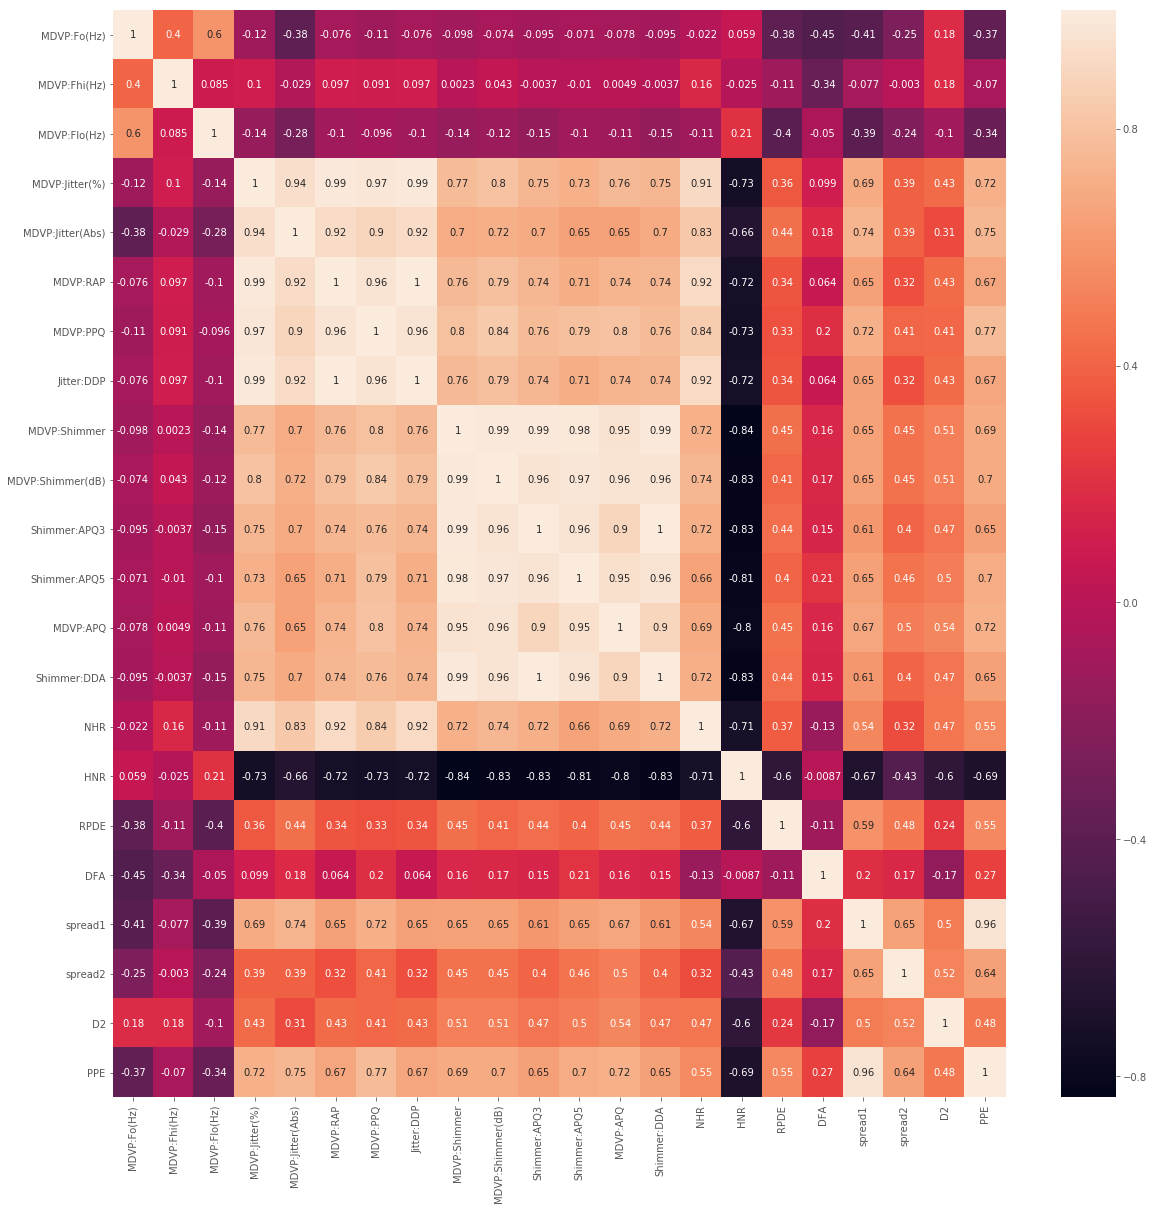

In [228]:
plt.figure(figsize=(20,20))
sns.heatmap(data.loc[:,feat_importances.index.tolist()].corr(), annot = True)

In [229]:
%%time
SelectNfeatures = 5
Model = LogisticRegression(random_state = 10)
rfecv = RFECV(estimator= Model, cv = 3, scoring = 'roc_auc')
rfecv = rfecv.fit(X, Y)
featureranking = rfecv.ranking_

CPU times: user 101 ms, sys: 3.31 ms, total: 105 ms
Wall time: 105 ms


In [230]:
rfecv.n_features_

7

In [231]:
FeaturesAfterWrapper = []
for elem in list(zip(featureranking, X.columns)):
    if elem[0] == 1:
        FeaturesAfterWrapper.append(elem[1])

In [232]:
FeaturesAfterWrapper

['MDVP:Shimmer(dB)', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

In [233]:
NewData = data[FeaturesAfterWrapper + ['status']]

In [234]:
NewData.shape

(195, 8)

In [235]:
NewData.describe()

,MDVP:Shimmer(dB),RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000,195.000,195.000,195.000,195.000,195.000,195.000,195.000
mean,0.282,0.499,0.718,-5.684,0.227,2.382,0.207,0.754
std,0.195,0.104,0.055,1.090,0.083,0.383,0.090,0.432
min,0.085,0.257,0.574,-7.965,0.006,1.423,0.045,0.000
25%,0.148,0.421,0.675,-6.450,0.174,2.099,0.137,1.000
50%,0.221,0.496,0.722,-5.721,0.219,2.362,0.194,1.000
75%,0.350,0.588,0.762,-5.046,0.279,2.636,0.253,1.000
max,1.302,0.685,0.825,-2.434,0.450,3.671,0.527,1.000


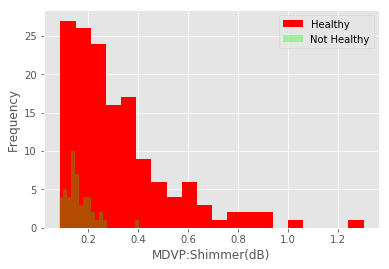

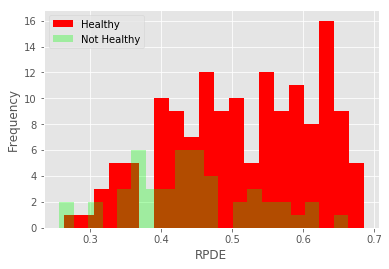

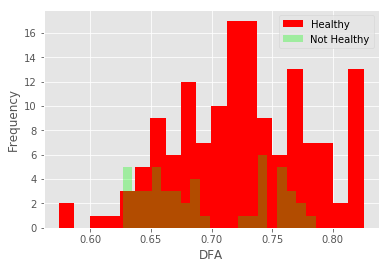

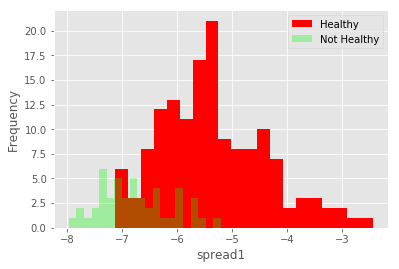

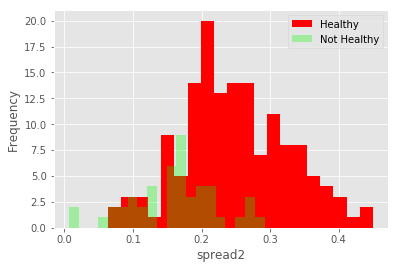

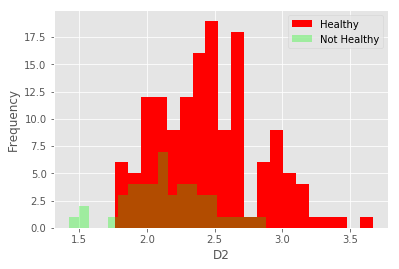

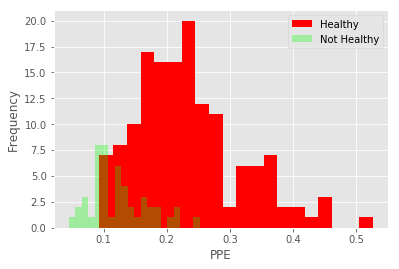

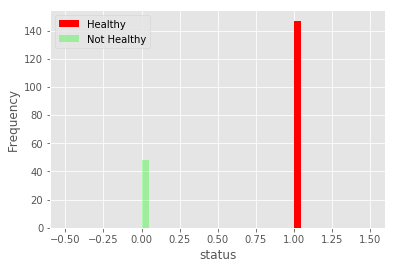

In [236]:
#Plot all x variable distributions to be categorized by Gold/No Gold to find out the characteristics of a Gold player
for col in NewData.loc[NewData.columns != 'status'].columns.tolist():
    plt.hist(NewData[NewData['status'] == 1][col], bins = 20, label = "Healthy", fc = (1,0,0, 1))
    plt.hist(NewData[NewData['status'] == 0][col], bins = 20, label = 'Not Healthy', fc = (0,1,0, 0.3) )
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [246]:
X = NewData.drop(['status'], axis = 1)
Y = NewData['status']

In [247]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(X)

In [248]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.20, random_state = 12)

In [255]:
# import pydotplus
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display, Image                               
# from ipywidgets import interactive
# import collections
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display                               
# from ipywidgets import interactive
# import graphviz

# data_feature_names = FeaturesAfterWrapper
# model = DecisionTreeClassifier(random_state = random_state)
# clf = model.fit(trainX, trainY)

# # dot_data = export_graphviz(clf,feature_names=data_feature_names,out_file=None,filled=True,rounded=True)
# # graph = pydotplus.graph_from_dot_data(dot_data)
# # colors = ('turquoise', 'orange')
# # edges = collections.defaultdict(list)

# # for edge in graph.get_edge_list():
# #     edges[edge.get_source()].append(int(edge.get_destination()))

# # for edge in edges:
# #     edges[edge].sort()    
# #     for i in range(2):
# #         dest = graph.get_node(str(edges[edge][i]))[0]
# #         dest.set_fillcolor(colors[i])
# dot_data = export_graphviz(clf,feature_names=data_feature_names, out_file = None)
# graph = graphviz.Source(dot_data)
# graph


In [182]:
random_state = 10
MLModels = [LogisticRegression(random_state = 10),KNeighborsClassifier(), DecisionTreeClassifier(random_state= random_state), SVC(random_state = random_state)]
ClassifierAlgos = ['Logistic Regression', 'kNN', 'Decision Tree','Support Vector Machine']
classifiers = zip(MLModels, ClassifierAlgos)

In [183]:
MLAccuracyDict = {}
#All ML model
for model, modelname in classifiers:
    Model = model
    Model = Model.fit(trainX,trainY)
    ModelPredict = Model.predict(testX)
    MLAccuracyDict[modelname] = accuracy_score(testY, ModelPredict)

In [273]:
AccuracyDF = pd.DataFrame(MLAccuracyDict, index = range(1)).transpose().rename(columns = {0: "Accuracy"})
AccuracyDF['Accuracy'] = AccuracyDF['Accuracy'].apply(lambda x: round(x,3)*100)

Text(0,0.5,'Accuracy (%)')

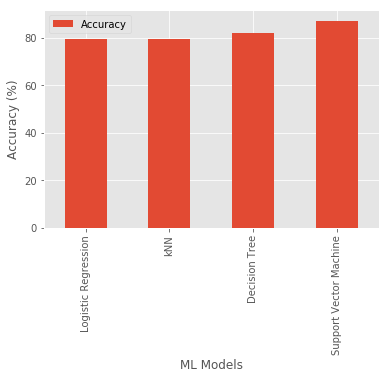

In [279]:
AccuracyDF.plot.bar()
plt.xlabel('ML Models')
plt.ylabel('Accuracy (%)')